In [ ]:
#!pip install shap
#!pip install xgboost
#!pip install pdpbox
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from pdpbox import pdp
# 替换以下路径为你的Google Drive中的实际文件路径
# file_path = '/content/drive/My Drive/diabetes_binary_health_indicators_BRFSS2015.csv'
file_path = '/content/diabetes_binary_health_indicators_BRFSS2015.csv'
# 读取数据集
df = pd.read_csv(file_path)

# 查看前几行数据
df.head()

ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/pytho

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Splitting the dataset into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Further split the train+validation set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42) # 0.1765 of 0.85 is approximately 0.15 of the whole

# Check the size of each set
X_train.shape, X_val.shape, X_test.shape

((177569, 21), (38059, 21), (38052, 21))

A

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss


data = df

data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values that were created by non-numeric values
data.dropna(inplace=True)

# Split the data into features and target
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate and print a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

# Calculate log loss
logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss}')


Accuracy: 0.8658546199936928
Confusion Matrix:
[[42773   966]
 [ 5840  1157]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

ROC AUC Score: 0.5716355142265003
Log Loss: 4.8350895806987415


B

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Training the baseline XGBoost model
xgb_baseline = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_baseline.fit(X_train, y_train)

# Predicting on the validation set
y_val_pred = xgb_baseline.predict(X_val)

# Calculating accuracy on the validation set
baseline_accuracy = accuracy_score(y_val, y_val_pred)
baseline_accuracy

0.8651304553456476

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np

# 定义XGBoost模型
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 定义参数网格
param_grid = {
    'max_depth': [3, 6, 9],  # 树的最大深度
    'n_estimators': [50, 100, 150],  # 树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'lambda': [1, 1.5, 2],  # L2正则化权重
}

# 设置网格搜索
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=1, scoring='accuracy', verbose=2)


# Execute GridSearch
grid_search.fit(X_train, y_train)

# Extract information from the grid search
cv_results = grid_search.cv_results_
sorted_indices = np.argsort(cv_results['mean_test_score'])[::-1]  # Sort by test score in descending order

# Save the top nine parameter combinations and their corresponding accuracies
top_n = 9  # Change this value if you want more or fewer top models
best_params_list = []
for i in range(top_n):
    rank = sorted_indices[i]
    best_params_list.append(cv_results['params'][rank])  # Save the best parameters
    print(f"Model {i+1}: {best_params_list[-1]}, Accuracy: {cv_results['mean_test_score'][rank]}")



Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.9s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.9s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.5s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.2s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END lambda=1, learning_rate=0.01, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END lambda=1, learning_rate=0.01, max_depth=6, n_estimators=50; total time=   1.0s
[CV] END lambda=1, learning_rate=0.01, max_depth=6, 

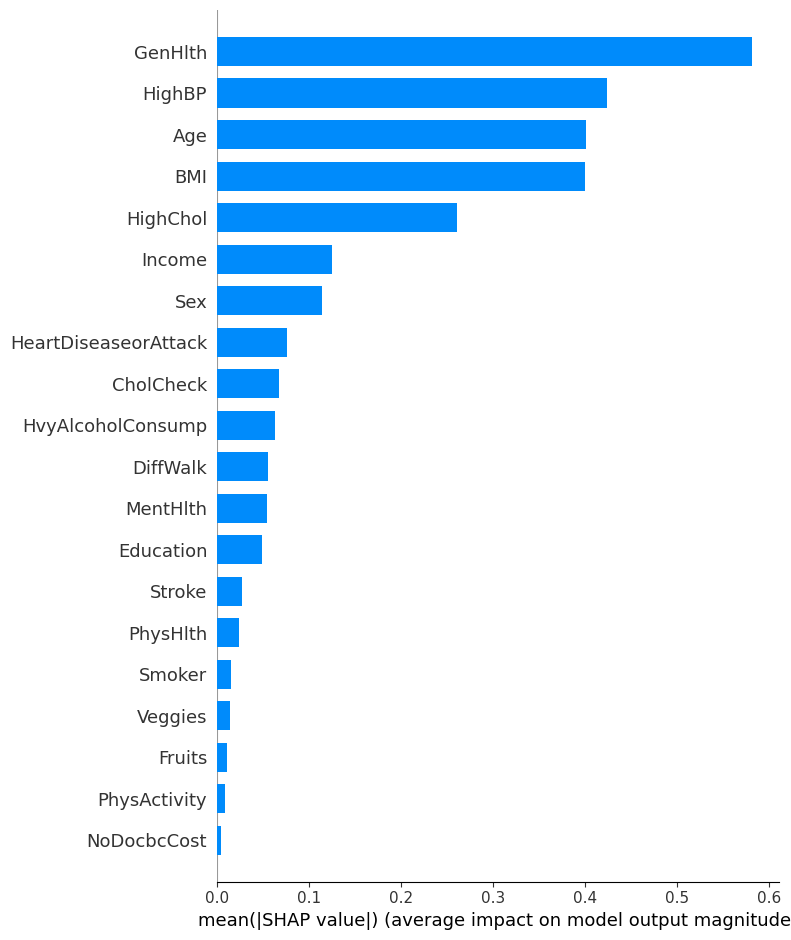

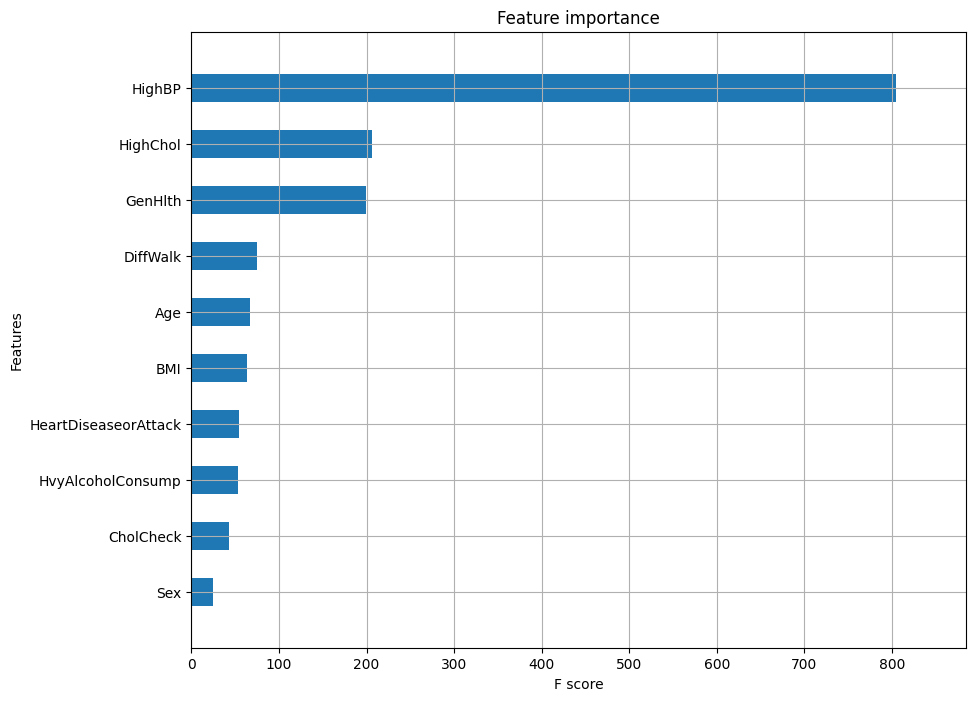

Feature importances by gain: [('HighBP', 804.5098266601562), ('HighChol', 206.24644470214844), ('GenHlth', 199.87286376953125), ('DiffWalk', 74.53904724121094), ('Age', 67.04154968261719), ('BMI', 63.9440803527832), ('HeartDiseaseorAttack', 54.143863677978516), ('HvyAlcoholConsump', 53.560028076171875), ('CholCheck', 42.59661102294922), ('Sex', 24.611967086791992), ('Income', 21.165987014770508), ('Stroke', 12.225930213928223), ('Smoker', 7.5796217918396), ('Fruits', 6.708648204803467), ('NoDocbcCost', 6.340210437774658), ('Education', 5.4572906494140625), ('PhysActivity', 5.214535713195801), ('Veggies', 4.932389259338379), ('MentHlth', 4.867852687835693), ('PhysHlth', 4.675145626068115), ('AnyHealthcare', 3.809899091720581)]


In [ ]:
from xgboost import XGBClassifier, plot_importance
import shap
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined and best_params contains the parameters
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

# For SHAP values
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# For Gain
# Get feature importances and their names
feature_importances = xgb_best.get_booster().get_score(importance_type='gain')
# Sort the feature importances by gain
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_best, importance_type='gain', max_num_features=10, height=0.5, ax=ax, show_values=False)
plt.show()

# Print the sorted importances for textual representation
print("Feature importances by gain:", sorted_importances)

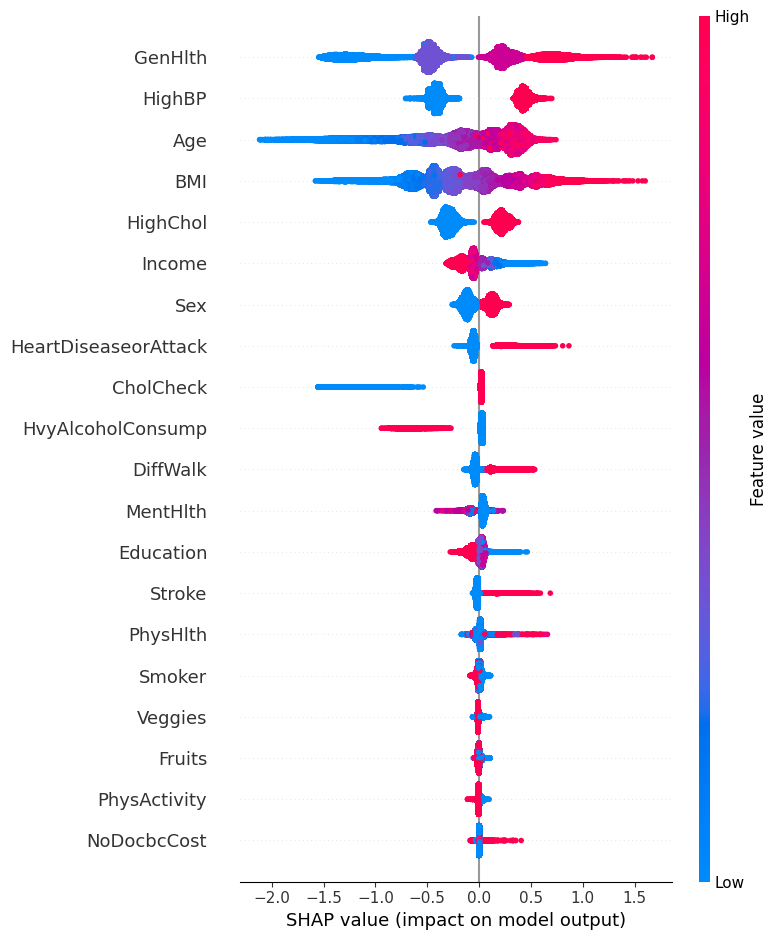

{'HighBP': 804.5098266601562, 'HighChol': 206.24644470214844, 'CholCheck': 42.59661102294922, 'BMI': 63.9440803527832, 'Smoker': 7.5796217918396, 'Stroke': 12.225930213928223, 'HeartDiseaseorAttack': 54.143863677978516, 'PhysActivity': 5.214535713195801, 'Fruits': 6.708648204803467, 'Veggies': 4.932389259338379, 'HvyAlcoholConsump': 53.560028076171875, 'AnyHealthcare': 3.809899091720581, 'NoDocbcCost': 6.340210437774658, 'GenHlth': 199.87286376953125, 'MentHlth': 4.867852687835693, 'PhysHlth': 4.675145626068115, 'DiffWalk': 74.53904724121094, 'Sex': 24.611967086791992, 'Age': 67.04154968261719, 'Education': 5.4572906494140625, 'Income': 21.165987014770508}


In [ ]:
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)


explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

feature_importances = xgb_best.get_booster().get_score(importance_type='gain')
print(feature_importances)

C

In [ ]:
!pip install shap
!pip install xgboost
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Feature Importance by Gain
feature_importance_gain = xgb_best.get_booster().get_score(importance_type='gain')

# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

# Summarize the SHAP values in a dataframe for easy understanding
shap_summary = pd.DataFrame(shap_values, columns=X_train.columns)

# Aggregate the absolute SHAP values per feature
shap_importance = shap_summary.abs().mean().sort_values(ascending=False)

# Print results
print("Feature Importance by Gain:")
for feature, importance in feature_importance_gain.items():
    print(f"{feature}: {importance}")

print("\nFeature Importance by SHAP:")
print(shap_importance)


Feature Importance by Gain:
HighBP: 804.5098266601562
HighChol: 206.24644470214844
CholCheck: 42.59661102294922
BMI: 63.9440803527832
Smoker: 7.5796217918396
Stroke: 12.225930213928223
HeartDiseaseorAttack: 54.143863677978516
PhysActivity: 5.214535713195801
Fruits: 6.708648204803467
Veggies: 4.932389259338379
HvyAlcoholConsump: 53.560028076171875
AnyHealthcare: 3.809899091720581
NoDocbcCost: 6.340210437774658
GenHlth: 199.87286376953125
MentHlth: 4.867852687835693
PhysHlth: 4.675145626068115
DiffWalk: 74.53904724121094
Sex: 24.611967086791992
Age: 67.04154968261719
Education: 5.4572906494140625
Income: 21.165987014770508

Feature Importance by SHAP:
GenHlth                 0.581921
HighBP                  0.423593
Age                     0.401494
BMI                     0.399829
HighChol                0.260806
Income                  0.125582
Sex                     0.114433
HeartDiseaseorAttack    0.076115
CholCheck               0.067949
HvyAlcoholConsump       0.062623
DiffWalk    

D

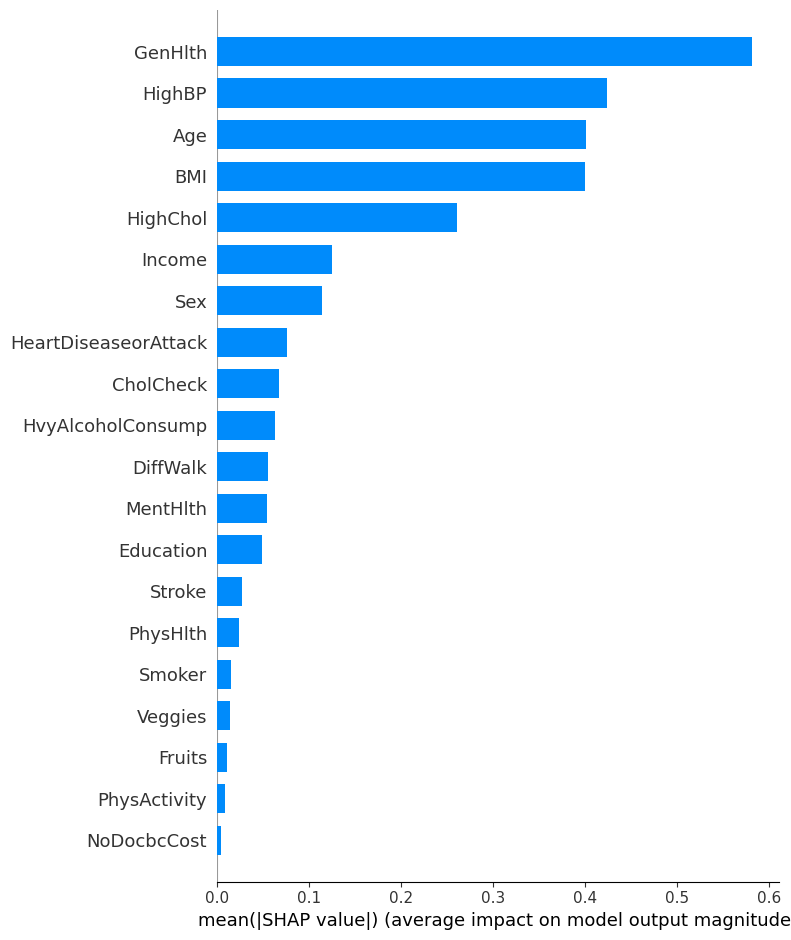

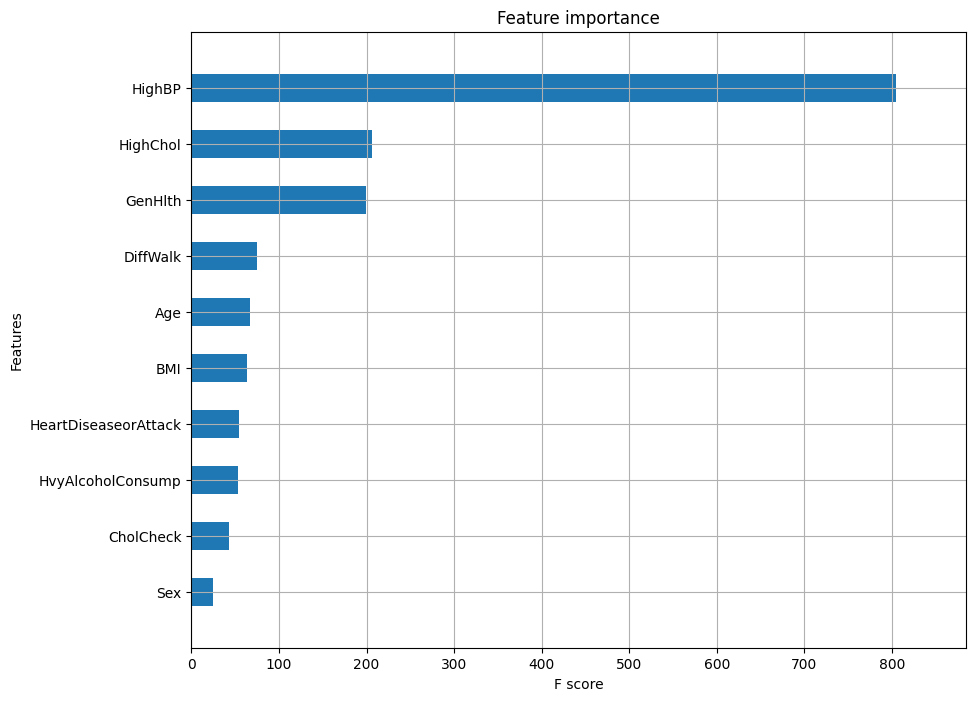

Feature importances by gain: [('HighBP', 804.5098266601562), ('HighChol', 206.24644470214844), ('GenHlth', 199.87286376953125), ('DiffWalk', 74.53904724121094), ('Age', 67.04154968261719), ('BMI', 63.9440803527832), ('HeartDiseaseorAttack', 54.143863677978516), ('HvyAlcoholConsump', 53.560028076171875), ('CholCheck', 42.59661102294922), ('Sex', 24.611967086791992), ('Income', 21.165987014770508), ('Stroke', 12.225930213928223), ('Smoker', 7.5796217918396), ('Fruits', 6.708648204803467), ('NoDocbcCost', 6.340210437774658), ('Education', 5.4572906494140625), ('PhysActivity', 5.214535713195801), ('Veggies', 4.932389259338379), ('MentHlth', 4.867852687835693), ('PhysHlth', 4.675145626068115), ('AnyHealthcare', 3.809899091720581)]


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.inspection import PartialDependenceDisplay
import shap
import matplotlib.pyplot as plt

# For SHAP values
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# For Gain
# Get feature importances and their names
feature_importances = xgb_best.get_booster().get_score(importance_type='gain')
# Sort the feature importances by gain
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_best, importance_type='gain', max_num_features=10, height=0.5, ax=ax, show_values=False)
plt.show()

# Print the sorted importances for textual representation
print("Feature importances by gain:", sorted_importances)



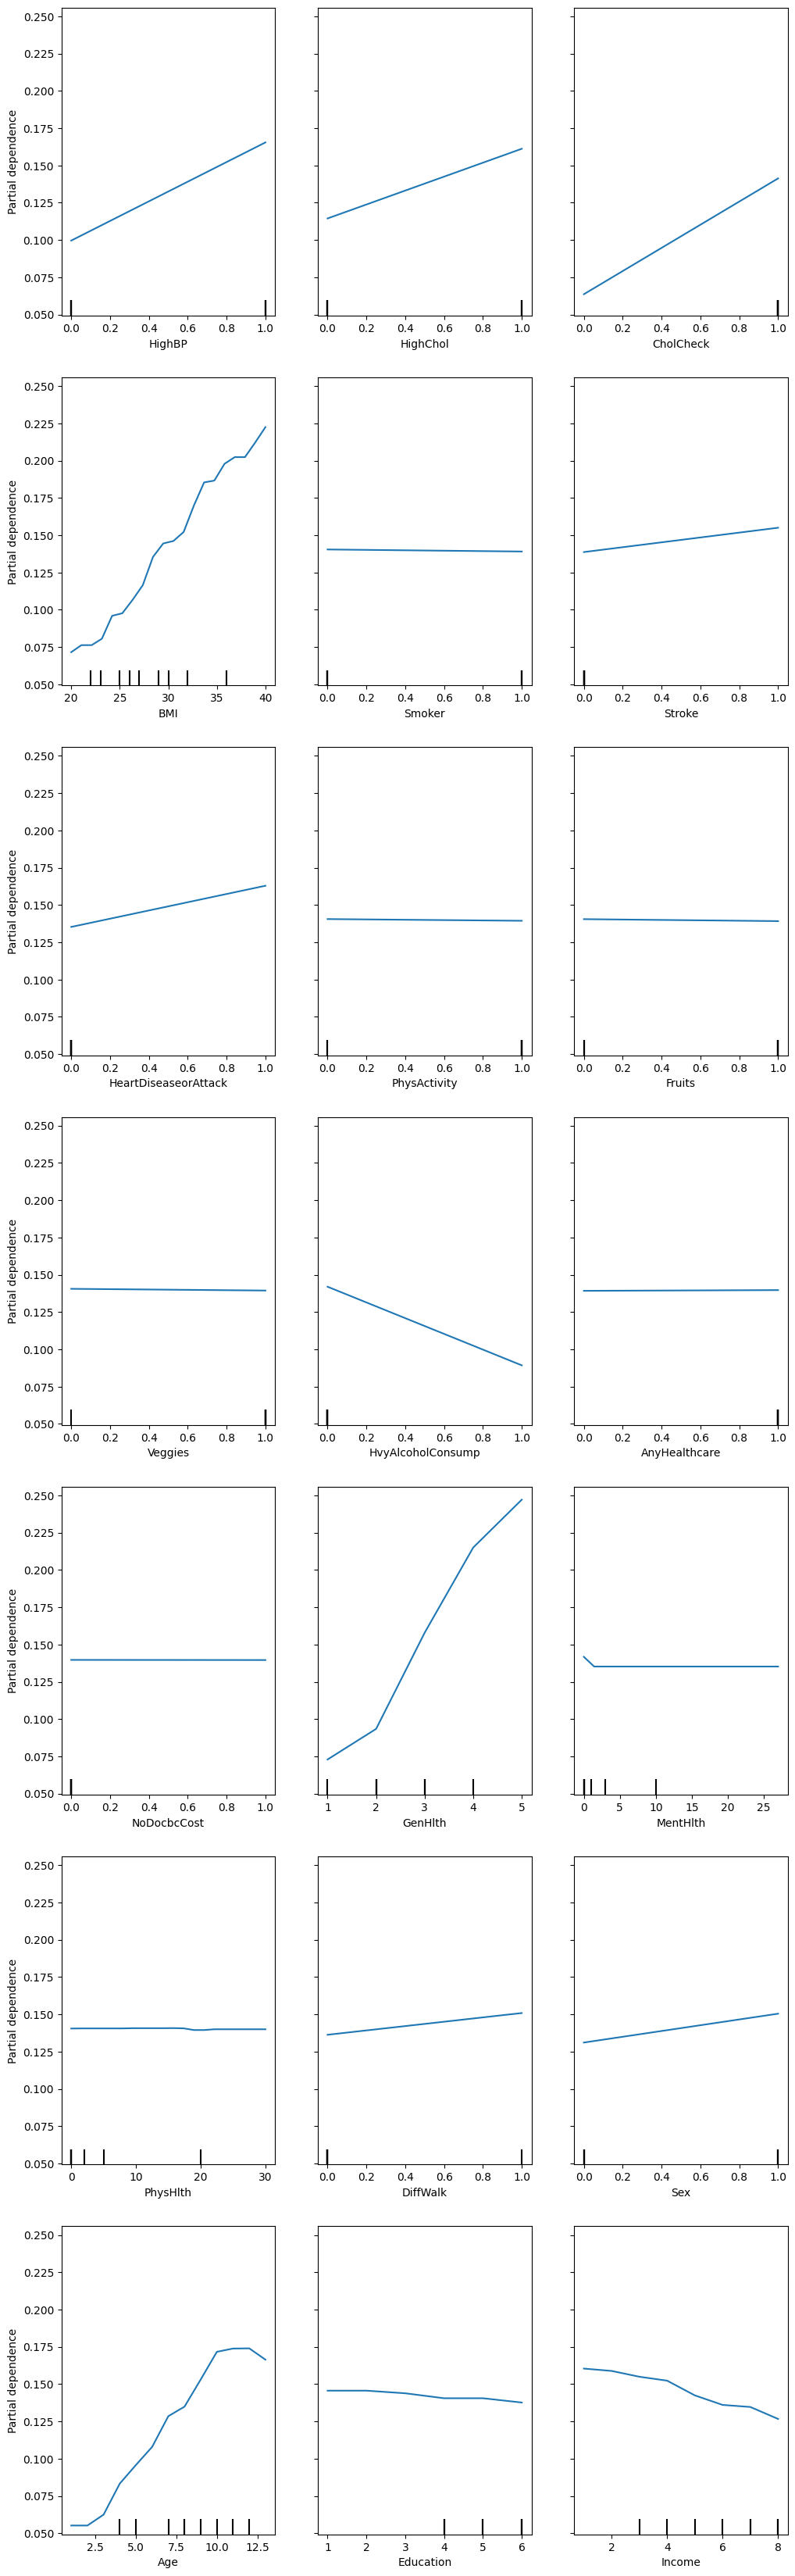

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# List of features for which we wish to plot the PDPs
# You should replace these indices with the actual feature names or indices of interest in your dataset
features = list(range(X_train.shape[1]))  # Plotting PDP for all features for demonstration

# Plot Partial Dependence
fig, ax = plt.subplots(figsize=(12, (len(features) * 2)))  # Adjust the size as needed
display = PartialDependenceDisplay.from_estimator(xgb_best, X_train, features, ax=ax, grid_resolution=20, kind='average')

plt.show()



E F

In [ ]:
# Get accuracy score
from sklearn.metrics import accuracy_score
y_pred_test = xgb_best.predict(X_test)
y_pred_train_val = xgb_best.predict(X_train_val)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train_val = accuracy_score(y_train_val, y_pred_train_val)

{
    "best_params": best_params,
    "accuracy_test": accuracy_test,
    "accuracy_train_val": accuracy_train_val
}

{'best_params': {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50},
 'accuracy_test': 0.8679175864606328,
 'accuracy_train_val': 0.8664969298977869}

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Assuming the best_model has been trained and is available as xgb_model
# and X_test, y_test are already defined from the test split

# Predict on the test set
y_test_pred = xgb_model.predict(X_test)
y_test_pred_proba = xgb_model.predict_proba(X_test)[:,1]

# Calculate the metrics
accuracy = accuracy_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)  # Sensitivity is the same as recall
specificity = recall_score(y_test, y_test_pred, pos_label=0)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

# Create a dictionary to hold the metrics
test_metrics = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1,
    "AUC": auc
}

test_metrics


{'Accuracy': 0.8624645222327342,
 'Sensitivity': 0.19036730027154494,
 'Specificity': 0.9699810238002697,
 'Precision': 0.5035916824196597,
 'F1 Score': 0.2762912258867455,
 'AUC': 0.8195234047502593}

the most accurate additive model below

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the XGBClassifier with basic parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Add metrics storage
best_n_estimators = 0
best_accuracy = 0
best_sensitivity = 0  # Also known as recall
best_specificity = 0
best_f1_score = 0
best_auc = 0
best_model = None

# Try different numbers of trees to find the most accurate model on the validation set
for n_estimators in range(1, 501, 10):  # Incrementing by 10 for faster convergence; adjust as needed
    xgb_model.set_params(n_estimators=n_estimators)
    xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=False)

    # Predict on the validation set
    y_val_pred = xgb_model.predict(X_val)
    y_val_prob = xgb_model.predict_proba(X_val)[:, 1]  # Probability estimates for AUC
    current_accuracy = accuracy_score(y_val, y_val_pred)
    current_sensitivity = recall_score(y_val, y_val_pred)
    current_specificity = recall_score(y_val, y_val_pred, pos_label=0)
    current_f1_score = f1_score(y_val, y_val_pred)
    current_auc = roc_auc_score(y_val, y_val_prob)

    # Check if the current model is the best one
    if current_accuracy > best_accuracy:
        best_n_estimators = n_estimators
        best_accuracy = current_accuracy
        best_sensitivity = current_sensitivity
        best_specificity = current_specificity
        best_f1_score = current_f1_score
        best_auc = current_auc
        best_model = xgb_model
    else:
        # Stop if the accuracy doesn't improve
        break

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for AUC
test_accuracy = accuracy_score(y_test, y_test_pred)
test_sensitivity = recall_score(y_test, y_test_pred)
test_specificity = recall_score(y_test, y_test_pred, pos_label=0)
test_f1_score = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

best_model_performance = {
    "best_n_estimators": best_n_estimators,
    "best_val_accuracy": best_accuracy,
    "best_val_sensitivity": best_sensitivity,
    "best_val_specificity": best_specificity,
    "best_val_f1_score": best_f1_score,
    "best_val_auc": best_auc,
    "test_accuracy": test_accuracy,
    "test_sensitivity": test_sensitivity,
    "test_specificity": test_specificity,
    "test_f1_score": test_f1_score,
    "test_auc": test_auc
}

print(best_model_performance)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

{'best_n_estimators': 491, 'best_val_accuracy': 0.8960298483932841, 'best_val_sensitivity': 0.33515757690130216, 'best_val_specificity': 0.9867521367521368, 'best_val_f1_score': 0.4730323611666001, 'best_val_auc': 0.8944646754139112, 'test_accuracy': 0.8624645222327342, 'test_sensitivity': 0.19036730027154494, 'test_specificity': 0.9699810238002697, 'test_f1_score': 0.2762912258867455, 'test_auc': 0.8195234047502593}


In [ ]:
!pip install pygam
import numpy as np
import pandas as pd
from pygam import LogisticGAM, s, f
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Fit a GAM model using the training data
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) +
                  s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) +
                  s(19) + s(20))  # Specify the terms for your model based on the number of features
gam.gridsearch(X_train.values, y_train.values)

# Use the validation data to optimize the model (already done by gridsearch in this case)

# Predict on test data
y_test_pred = gam.predict(X_test.values)
y_test_pred_proba = gam.predict_proba(X_test.values)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 1] + conf_matrix[0, 0])
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')
print(f'AUC: {auc}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 5.0 MB/s eta 0:00:00


100% (11 of 11) |########################| Elapsed Time: 0:18:23 Time:  0:18:23


Accuracy: 0.8674905392620624
Sensitivity: 0.18036301271973704
Specificity: 0.9774114634536684
F1 Score: 0.2729533902887423
AUC: 0.83214551132059


In [ ]:
!pip install xgboost hyperopt scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Split your dataset (Assuming the data has already been split as per your message)
# X_train, X_val, X_test, y_train, y_val, y_test

# Define the space of hyperparameters to search
space = {
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 9, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'gamma': hp.uniform('gamma', 0.01, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

# Objective function to minimize
def objective(space):
    model = XGBClassifier(
        n_estimators = int(space['n_estimators']),
        max_depth = int(space['max_depth']),
        min_child_weight = space['min_child_weight'],
        subsample = space['subsample'],
        learning_rate = space['learning_rate'],
        gamma = space['gamma'],
        colsample_bytree = space['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='logloss'
    )

    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=30, verbose=False)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Fit the model with the best hyperparameters
best_model = XGBClassifier(
    n_estimators = int(best_hyperparams['n_estimators']),
    max_depth = int(best_hyperparams['max_depth']),
    min_child_weight = best_hyperparams['min_child_weight'],
    subsample = best_hyperparams['subsample'],
    learning_rate = best_hyperparams['learning_rate'],
    gamma = best_hyperparams['gamma'],
    colsample_bytree = best_hyperparams['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='logloss'
)
best_model.fit(X_train_val, y_train_val)

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:,1]

# Calculate the metrics
accuracy = accuracy_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)  # Sensitivity is the same as recall
specificity = recall_score(y_test, y_test_pred, pos_label=0)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred_proba)

# Output the metrics
metrics = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "F1 Score": f1,
    "AUC": auc
}

metrics


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  1%|          | 1/100 [00:38<1:03:31, 38.50s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  2%|▏         | 2/100 [00:50<37:02, 22.68s/trial, best loss: -0.9537297354108095]  

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  3%|▎         | 3/100 [01:32<50:57, 31.52s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  4%|▍         | 4/100 [01:40<35:58, 22.49s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  5%|▌         | 5/100 [02:16<43:19, 27.36s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  6%|▌         | 6/100 [02:42<41:45, 26.65s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  7%|▋         | 7/100 [03:14<44:25, 28.67s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  8%|▊         | 8/100 [04:10<56:53, 37.11s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  9%|▉         | 9/100 [04:14<40:58, 27.02s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|█         | 10/100 [04:26<33:26, 22.30s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 11%|█         | 11/100 [05:02<39:06, 26.37s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█▏        | 12/100 [05:11<30:55, 21.09s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 13%|█▎        | 13/100 [05:57<41:47, 28.82s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|█▍        | 14/100 [06:26<41:13, 28.77s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 15%|█▌        | 15/100 [06:36<32:42, 23.09s/trial, best loss: -0.9537297354108095]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 16%|█▌        | 16/100 [07:32<46:03, 32.90s/trial, best loss: -0.9645287579810294]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 17%|█▋        | 17/100 [08:06<46:06, 33.33s/trial, best loss: -0.9645287579810294]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|█▊        | 18/100 [08:44<47:26, 34.72s/trial, best loss: -0.9680758821829265]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|█▉        | 19/100 [09:14<44:48, 33.19s/trial, best loss: -0.9680758821829265]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|██        | 20/100 [09:31<38:09, 28.61s/trial, best loss: -0.9680758821829265]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|██        | 21/100 [10:32<50:25, 38.30s/trial, best loss: -0.978165479912767] 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|██▏       | 22/100 [11:33<58:21, 44.89s/trial, best loss: -0.978165479912767]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|██▎       | 23/100 [12:42<1:06:58, 52.19s/trial, best loss: -0.9783494048713839]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|██▍       | 24/100 [13:50<1:12:11, 57.00s/trial, best loss: -0.9813447541974303]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 25%|██▌       | 25/100 [14:17<59:54, 47.92s/trial, best loss: -0.9813447541974303]  

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|██▌       | 26/100 [15:31<1:08:53, 55.85s/trial, best loss: -0.9813447541974303]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 27%|██▋       | 27/100 [16:24<1:06:46, 54.89s/trial, best loss: -0.9813447541974303]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|██▊       | 28/100 [17:20<1:06:21, 55.30s/trial, best loss: -0.9813447541974303]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|██▉       | 29/100 [18:08<1:02:42, 53.00s/trial, best loss: -0.9813447541974303]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|███       | 30/100 [19:16<1:07:22, 57.74s/trial, best loss: -0.9813447541974303]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 31%|███       | 31/100 [20:35<1:13:42, 64.10s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|███▏      | 32/100 [21:27<1:08:22, 60.33s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|███▎      | 33/100 [22:01<58:29, 52.38s/trial, best loss: -0.9825796789195722]  

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███▍      | 34/100 [22:57<58:48, 53.47s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|███▌      | 35/100 [23:51<58:09, 53.69s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|███▌      | 36/100 [24:35<54:05, 50.72s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 37%|███▋      | 37/100 [25:19<51:08, 48.70s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|███▊      | 38/100 [26:20<54:13, 52.47s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|███▉      | 39/100 [26:56<48:12, 47.42s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|████      | 40/100 [27:35<44:52, 44.87s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|████      | 41/100 [27:49<35:16, 35.87s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|████▏     | 42/100 [28:39<38:29, 39.82s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|████▎     | 43/100 [29:03<33:27, 35.22s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████▍     | 44/100 [29:24<28:50, 30.90s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 45%|████▌     | 45/100 [29:47<26:15, 28.65s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|████▌     | 46/100 [30:50<35:02, 38.93s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|████▋     | 47/100 [32:15<46:36, 52.77s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|████▊     | 48/100 [32:52<41:41, 48.10s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 49%|████▉     | 49/100 [33:11<33:23, 39.28s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|█████     | 50/100 [33:16<24:13, 29.07s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|█████     | 51/100 [34:10<29:51, 36.57s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|█████▏    | 52/100 [35:00<32:17, 40.37s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 53%|█████▎    | 53/100 [35:15<25:46, 32.91s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|█████▍    | 54/100 [36:21<32:49, 42.82s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 55%|█████▌    | 55/100 [37:28<37:32, 50.06s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████▌    | 56/100 [38:10<34:51, 47.54s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|█████▋    | 57/100 [39:18<38:37, 53.90s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|█████▊    | 58/100 [39:36<30:02, 42.92s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|█████▉    | 59/100 [40:10<27:28, 40.21s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|██████    | 60/100 [41:02<29:10, 43.77s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|██████    | 61/100 [41:19<23:16, 35.82s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|██████▏   | 62/100 [42:11<25:45, 40.67s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 63%|██████▎   | 63/100 [42:40<22:55, 37.18s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|██████▍   | 64/100 [42:48<17:01, 28.36s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|██████▌   | 65/100 [43:43<21:10, 36.29s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████▌   | 66/100 [44:34<23:11, 40.93s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 67%|██████▋   | 67/100 [45:23<23:42, 43.12s/trial, best loss: -0.9825796789195722]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|██████▊   | 68/100 [46:41<28:42, 53.82s/trial, best loss: -0.9847342284347986]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 69%|██████▉   | 69/100 [48:03<32:02, 62.02s/trial, best loss: -0.9847342284347986]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|███████   | 70/100 [49:18<32:59, 65.98s/trial, best loss: -0.9847342284347986]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 71%|███████   | 71/100 [50:39<34:05, 70.54s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|███████▏  | 72/100 [52:00<34:19, 73.56s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|███████▎  | 73/100 [53:10<32:44, 72.75s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|███████▍  | 74/100 [54:26<31:57, 73.73s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 75%|███████▌  | 75/100 [55:34<30:00, 72.02s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|███████▌  | 76/100 [56:40<28:05, 70.23s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 77%|███████▋  | 77/100 [57:50<26:52, 70.12s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████▊  | 78/100 [58:48<24:23, 66.53s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 79%|███████▉  | 79/100 [59:59<23:41, 67.71s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████  | 80/100 [1:00:52<21:04, 63.21s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 81%|████████  | 81/100 [1:01:46<19:08, 60.46s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|████████▏ | 82/100 [1:02:25<16:14, 54.17s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 83%|████████▎ | 83/100 [1:03:00<13:43, 48.45s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|████████▍ | 84/100 [1:03:41<12:17, 46.10s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 85%|████████▌ | 85/100 [1:04:16<10:39, 42.65s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|████████▌ | 86/100 [1:04:53<09:36, 41.20s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 87%|████████▋ | 87/100 [1:05:39<09:14, 42.65s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████▊ | 88/100 [1:06:24<08:39, 43.25s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 89%|████████▉ | 89/100 [1:07:43<09:53, 54.00s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████ | 90/100 [1:08:18<08:01, 48.13s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|█████████ | 91/100 [1:08:43<06:11, 41.23s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|█████████▏| 92/100 [1:09:18<05:15, 39.44s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|█████████▎| 93/100 [1:10:02<04:46, 40.88s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|█████████▍| 94/100 [1:10:41<04:02, 40.41s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|█████████▌| 95/100 [1:11:12<03:06, 37.32s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|█████████▌| 96/100 [1:11:57<02:39, 39.81s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|█████████▋| 97/100 [1:13:17<02:35, 51.77s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|█████████▊| 98/100 [1:14:13<01:45, 52.98s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 99%|█████████▉| 99/100 [1:14:43<00:46, 46.09s/trial, best loss: -0.9848130534170629]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|██████████| 100/100 [1:15:03<00:00, 45.04s/trial, best loss: -0.9848130534170629]


{'Accuracy': 0.8801245663828445,
 'Sensitivity': 0.4346148349292554,
 'Specificity': 0.9513934932211527,
 'F1 Score': 0.5,
 'AUC': 0.8371677863345869}